# Long Short Term Memory(LSTM) based - Stock predicition - # CPU based

Aim -to predict the Opening stock price using past 60 day stock price.



In [8]:
import math
import numpy as np
import pandas as pd
import pandas_datareader as pdr
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt



## Data prep

Works on Yahoo based data. (Doesnt contain Indian stock values) 

In [11]:
ticker = 'AMZN'  #amazon  start=   end = current date

In [4]:
ticker = 'TSLA'  #Tesla start=   end = current date

In [5]:
ticker = 'UBER'  #Uber start=   end = current date

In [6]:
ticker = 'TSLA'  #Tesla start=   end = current date

Change start and end date for collection, as per Company.  (Start date cant be before the company was founded.)

Different approaches can be used for Date collection - 


1.   Pretrain on 20+ year dataset, finetune for local
2.   Event specific timings - As in 2020, covid may lead to a new stock trading pattern.



In [13]:
# import pandas_datareader as pdr

df = pd.read_csv('../Stock-price-predicition/csv files/individual_stocks_5yr/CSCO_data.csv')
df


,date,open,high,low,close,volume,Name
0,2013-02-08,21.1699,21.300,21.13,21.16,23056853,CSCO
1,2013-02-11,21.2400,21.340,21.15,21.27,33551332,CSCO
2,2013-02-12,21.2500,21.270,20.94,20.97,46456472,CSCO
3,2013-02-13,21.0000,21.140,20.93,21.14,63085496,CSCO
4,2013-02-14,20.8800,21.000,20.51,20.99,67158759,CSCO
...,...,...,...,...,...,...,...
1254,2018-02-01,41.0900,42.110,40.67,41.70,26148507,CSCO
1255,2018-02-02,41.5000,41.950,40.87,40.93,27224206,CSCO
1256,2018-02-05,40.8700,41.405,38.72,38.78,52399572,CSCO
1257,2018-02-06,38.3300,40.305,37.35,40.17,55171559,CSCO


In [14]:
df.shape

(1259, 7)

In [15]:
#choose plotting style

#plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
#plt.style.use('ggplot')
#plt.style.use('seaborn-whitegrid')
#plt.style.use('bmh')
#plt.style.use('seaborn')

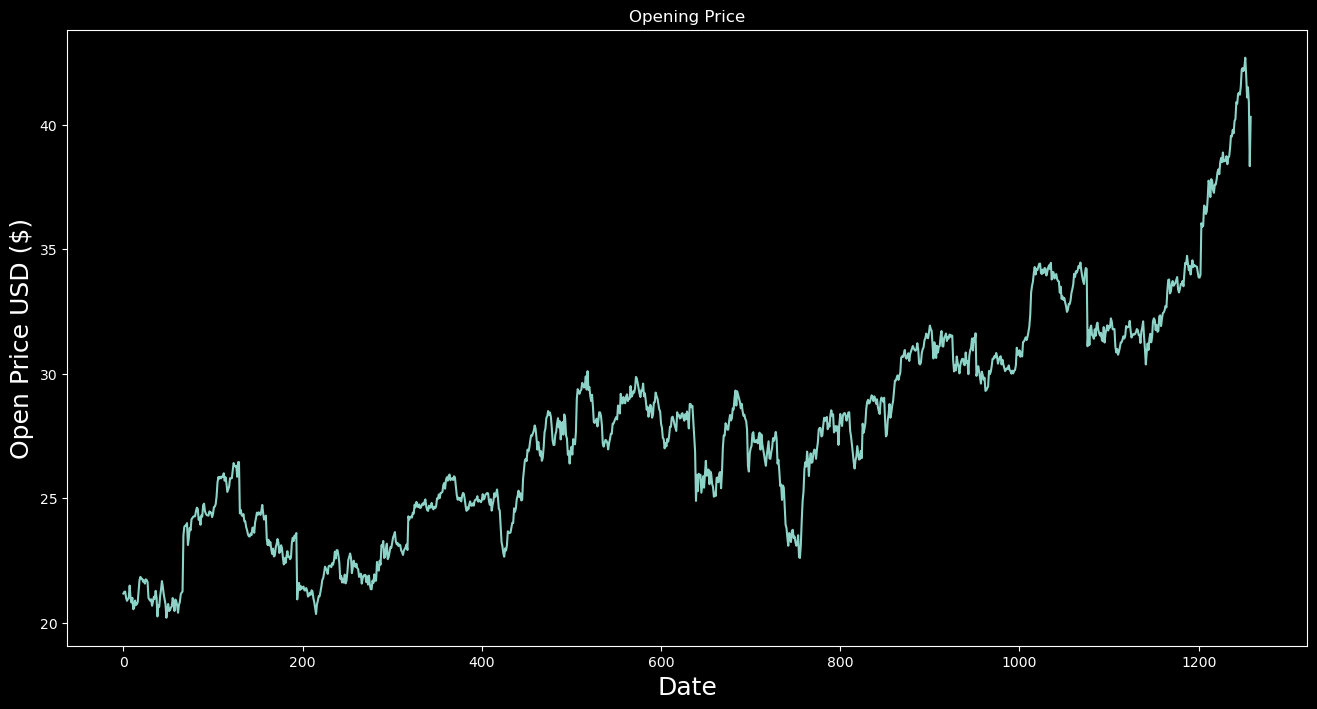

In [17]:
plt.figure(figsize=(16,8))
plt.title('Opening Price')
plt.plot(df['open'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price USD ($)', fontsize=18)
plt.show()

In [18]:
data=df.filter(['open'])

#Convert to np array
dataset=data.values

#Get the number of rows to train the model on
#math.ceil to round up 

training_data_len = math.ceil(len(dataset)*.8)


#print(dataset)
training_data_len

1008

In [19]:
#Scale the data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)



In [20]:
#Create training dataset
#Create scaled training dataset

train_data = scaled_data[0:training_data_len,:]

#Split the data into x_train and y_train data set

x_train=[]
y_train=[]

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.04313968, 0.0462573 , 0.04670204, 0.03558356, 0.0302467 ,
       0.03291513, 0.0360283 , 0.05737577, 0.03558356, 0.02713352,
       0.03558356, 0.01512557, 0.01779401, 0.03069144, 0.02268613,
       0.02402035, 0.028023  , 0.04892573, 0.06760477, 0.07294164,
       0.06982846, 0.06938373, 0.0644916 , 0.06671529, 0.06093368,
       0.06849425, 0.06716003, 0.06360212, 0.03558356, 0.03247039,
       0.0302467 , 0.03291513, 0.02135192, 0.02846774, 0.03736252,
       0.03380461, 0.04803626, 0.0360283 , 0.00222814, 0.02179666,
       0.01957296, 0.03869674, 0.05025995, 0.06538107, 0.05559682,
       0.04203228, 0.03335987, 0.02402035, 0.        , 0.01468083,
       0.02446509, 0.0120124 , 0.01334662, 0.01823874, 0.0200177 ,
       0.03513883, 0.028023  , 0.0120124 , 0.03247039, 0.02980196])]
[0.021351917492028027]



In [21]:
#convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [22]:
#Reshape the data into 3 dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(948, 60, 1)

## Model training 

In [23]:
#Build LSTM model
model=Sequential()
#Add first layer to model
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
#Add second layer to model
model.add(LSTM(50, return_sequences=False))
#Add Dense Layer to model with 25 neurons
model.add(Dense(25))
#Add Dense Layer to model with 1 neuron
model.add(Dense(1))

2024-04-24 22:12:23.294276: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2024-04-24 22:12:23.545874: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-24 22:12:23.547089: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-24 22:12:23.5

In [24]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [26]:
#Train the model
model.fit(x_train, y_train, batch_size=1,epochs=3)

Epoch 1/3
948/948 [==============================] - 40s 42ms/step - loss: 0.0011
Epoch 2/3
948/948 [==============================] - 43s 46ms/step - loss: 6.5255e-04
Epoch 3/3
948/948 [==============================] - 42s 45ms/step - loss: 5.2519e-04


## Testing and Validating model

In [27]:
#Create the test data set
#Create a new array containing scaled values

test_data=scaled_data[training_data_len-60: , : ]
#Create the data sets x_test and y_test

x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])
    


In [28]:
#Convert the data to a numpy array

x_test=np.array(x_test)


In [29]:
#Reshape the data to 3d
x_test=np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))


In [30]:
#Get the models predicted price values

predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)


2024-04-24 22:15:34.927052: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-24 22:15:34.928407: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-24 22:15:34.929280: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

8/8 [==============================] - 1s 73ms/step


In [31]:
#Get root mean squared error(RMSE)

rmse =np.sqrt(np.mean(predictions-y_test)**2)
rmse



0.03655044130120145

In [32]:
#choose plotting style

#plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
#plt.style.use('ggplot')
#plt.style.use('seaborn-whitegrid')
#plt.style.use('bmh')
#plt.style.use('seaborn')

/tmp/ipykernel_209583/3094777873.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


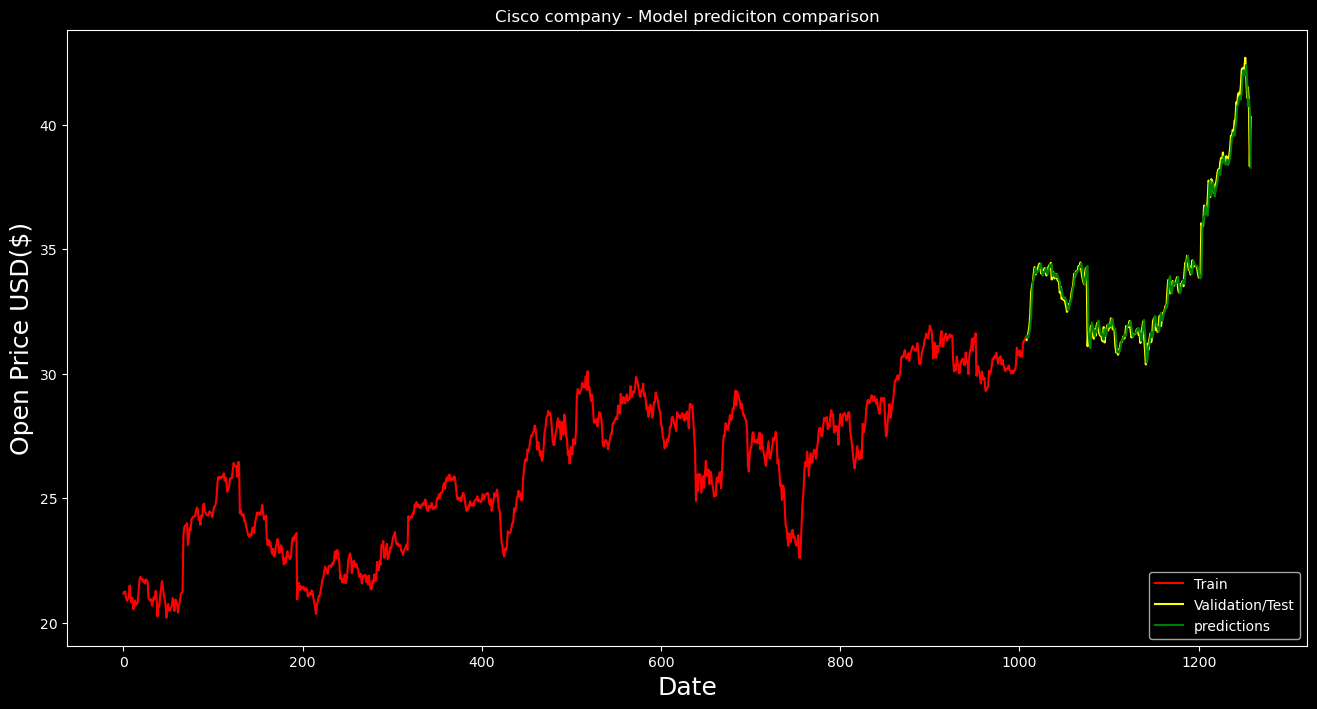

In [37]:
#plot the data

train=data[:training_data_len]
valid=data[training_data_len:]
valid['predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Cisco company - Model prediciton comparison')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price USD($)', fontsize=18)
plt.plot(train['open'] , color='red')
plt.plot(valid['open'] , color='yellow')
plt.plot(valid[ 'predictions'] , color='green')
plt.legend(['Train','Validation/Test', 'predictions'], loc='lower right')
# plt.savefig('/content/prediction.png')
plt.show()


In [35]:
#Show the valid and predicted prices

valid.tail(15)

,open,predictions
1244,41.240,40.804813
1245,41.280,41.066486
1246,41.200,41.129013
1247,41.540,41.004337
1248,42.200,41.273136
1249,42.270,41.990765
1250,42.150,42.183540
1251,42.300,41.967773
1252,42.685,41.995693
1253,41.980,42.395870


# Getting predicitions - for tomorrow

In [36]:
#Get the quote
stock_quote = pd.read_csv('../Stock-price-predicition/csv files/individual_stocks_5yr/CSCO_data.csv')

new_df=stock_quote.filter(['open'])
#Get last 60 days values and convert into array
last_60_days=new_df[-60:].values

#Scale the data to be values between 0
last_60_days_scaled=scaler.transform(last_60_days)

#Create an empty list
X_test=[]
#Appemd the past 60days
X_test.append(last_60_days_scaled)

#Conver the X_test data into numpy array
X_test = np.array(X_test)

#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
#Get predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price=scaler.inverse_transform(pred_price)
print(f'Opening Price of {ticker} tomorrow:{pred_price}')

1/1 [==============================] - 0s 26ms/step
Opening Price of AMZN tomorrow:[[39.546856]]


## Getting predicitions for 2 months from now ?

In [26]:
#Get the quote
stock_quote = web.DataReader(ticker, data_source='yahoo', start='2012-01-01', end='2020-05-24')

new_df=stock_quote.filter(['Open'])
#Get last 60 days values and convert into array
last_60_days=new_df[-60:].values

#Scale the data to be values between 0
last_60_days_scaled=scaler.transform(last_60_days)

#Create an empty list
X_test=[]
#Appemd the past 60days
X_test.append(last_60_days_scaled)

#Conver the X_test data into numpy array
X_test = np.array(X_test)

#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
#Get predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price=scaler.inverse_transform(pred_price)
print(f'Opening Price of {ticker} tomorrow:{pred_price}')

Opening Price of TSLA tomorrow:[[783.4997]]
